### Multiclass Classification of Fetal Health using Cardiotocogram Data

### Introduction

Fetal health care is one of the most challenging medical specialties to practice successfully because of the
complexity of a fetus's body and the quick rate at which fetuses develop. Reducing child and mother
mortality rates is of utmost importance to any modern society because of the difficulties with fetal health
care. Several of the Sustainable Development Goals set forth by the United Nations take child mortality
reduction into consideration. The UN anticipates that by 2030, member nations will successfully eradicate
the death of infants and children under the age of five that is preventable (Child Survival and the SDGs,
2021). All participating nations strive to lower newborn mortality to 12 deaths per 1,000 live births and
under-5 mortality to 25 deaths per 1,000 live births, respectively (Child Survival and the SDGs, 2021).
Even now, there are still significant racial/ethnic differences in maternal mortality and child mortality.
Women of color, American Indians, and Alaska Natives (AI/AN) are two to three times more likely than
white women to die during pregnancy, and this discrepancy only gets worse with age (National Center for
Health Statistics). So, it is essential to reduce child mortality as much as feasible.
The fetal heart rate monitor identifies the typical baseline rate and measures variability, accelerations, and
decelerations to provide insight into a baby's degree of stress, oxygenation, acidemia (increase in hydrogen
ion blood concentration), and other vital markers (Petker, 2018). To forecast fetal health outcomes and
level of care, a variety of models like- Gradient Boosting, Random Forest, Support Vector, Decision Tree, K-Nearest Neighbors, Linear Support Vector, and
Logistic Regression, applied to the cardiotocography data.

In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('fetal_health.csv')

In [4]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [5]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [6]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


### DATA VISUALIZATIONS

Text(0.5, 1.0, 'Number of samples of each class')

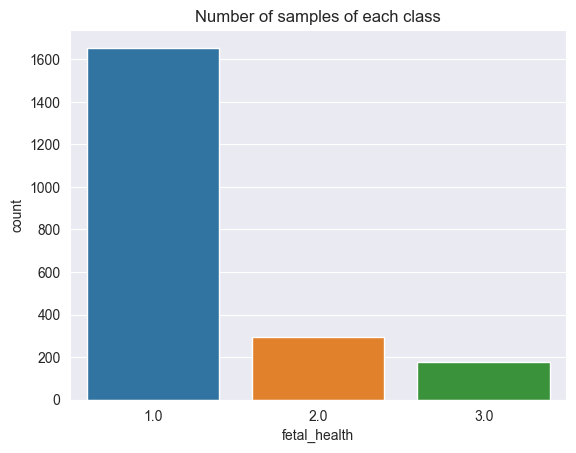

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')
sns.countplot(data=df,x='fetal_health')
plt.title("Number of samples of each class")

Observation: An highly Imbalanced Dataset. Which is obvious as Normal would be dominant.

Solution: Oversampling of the minority classes. To make better predictions.(Will perform later in the notebook)

#### Checking for Outliers

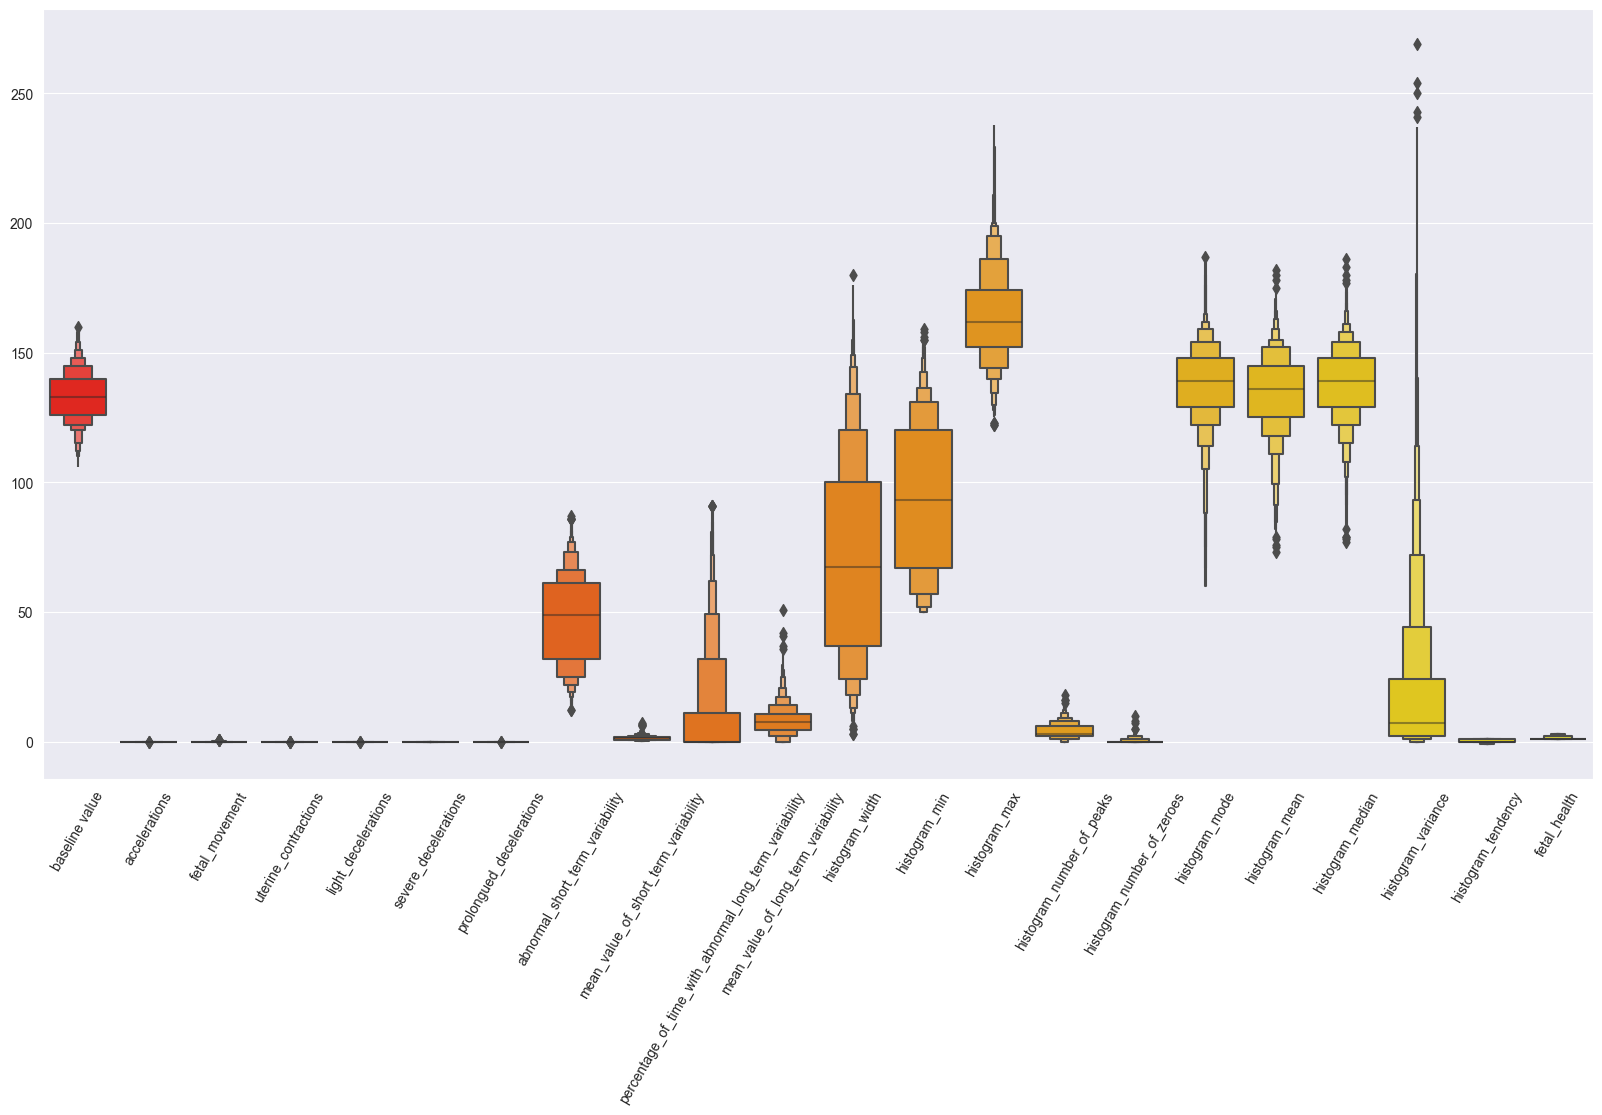

In [14]:
features=['baseline value', 'accelerations', 'fetal_movement','uterine_contractions', 'light_decelerations', 'severe_decelerations',
           'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability',
             'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability']

#Plotting the scaled features using boxen plots
plt.figure(figsize=(20,10))
sns.boxenplot(data = df, palette = 'autumn')
plt.xticks(rotation=60)
plt.show()

### Feature Engineering

In [15]:
# Feature and target separation
X = df.drop(columns=['fetal_health'],axis=1)
y = df['fetal_health']

In [16]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### SMOTE Technique

In previous exploration, it can be seen that the number between approved and rejected loan is imbalanced. In this section, oversampling technique will be used to avoid overfitting,

In [17]:
# For uneven data set output category
from imblearn.over_sampling import SMOTE

X, y = SMOTE().fit_resample(X_scaled, y)

In [18]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Use GridSearchCV

In [21]:
model_params = {
    'Support Vector Machine': {
        'model': SVC(gamma='auto', random_state=42),
        'params' : {
            'C': [1,10,.1],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(random_state=42),
        'params' : {
            'n_estimators': [50,100,200],
            'max_depth': [10,20,None]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'criterion': ['gini','entropy'],
            'max_depth': [10,20,None]
        }
    }     
}

In [23]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df 

,model,best_score,best_params
0,Support Vector Machine,0.968028,"{'C': 10, 'kernel': 'rbf'}"
1,random_forest,0.979101,"{'max_depth': 20, 'n_estimators': 100}"
2,logistic_regression,0.880659,{'C': 1}
3,K-Nearest Neighbors,0.966516,"{'n_neighbors': 3, 'weights': 'distance'}"
4,Gradient Boosting,0.980110,"{'learning_rate': 0.2, 'n_estimators': 200}"
5,decision_tree,0.955440,"{'criterion': 'entropy', 'max_depth': 20}"


       Feature  Importance
9    feature_9    0.140470
7    feature_7    0.121989
17  feature_17    0.103315
18  feature_18    0.081051
1    feature_1    0.075018
8    feature_8    0.068825
16  feature_16    0.060334
6    feature_6    0.053935
10  feature_10    0.053426
0    feature_0    0.049521
19  feature_19    0.041356
11  feature_11    0.026059
13  feature_13    0.024084
12  feature_12    0.021458
3    feature_3    0.019731
2    feature_2    0.016492
4    feature_4    0.015798
14  feature_14    0.014596
20  feature_20    0.008676
15  feature_15    0.003733
5    feature_5    0.000132


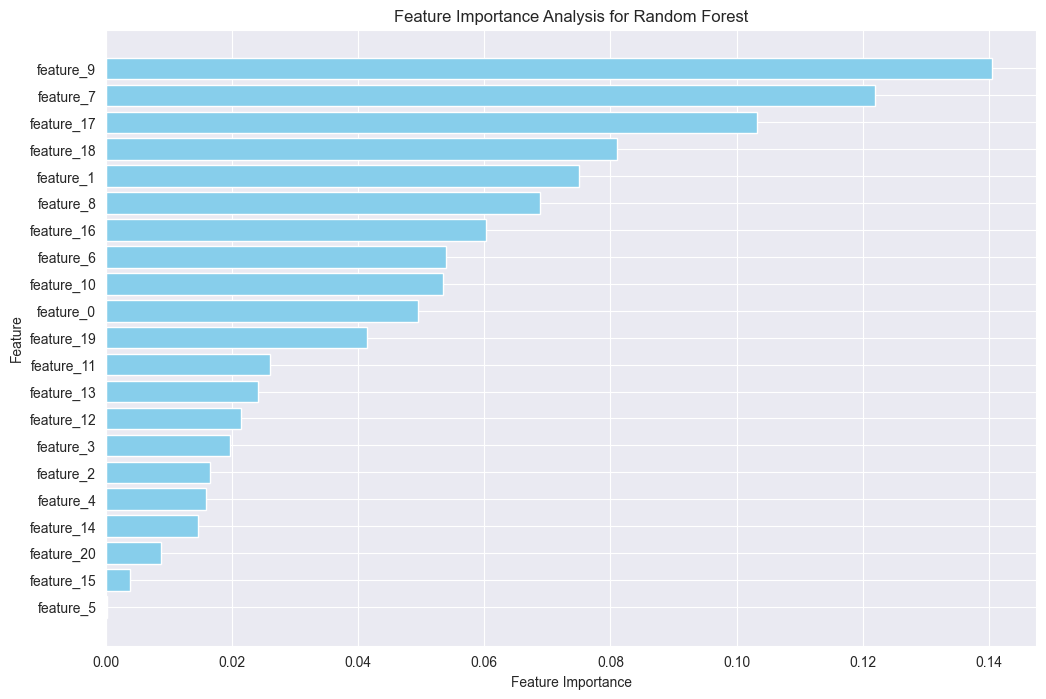

In [34]:
# Generate feature names if not available
num_features = X_train.shape[1]
feature_names = [f'feature_{i}' for i in range(num_features)]

# Fit the GridSearchCV for the Random Forest model again
random_forest_params = model_params['random_forest']['params']
random_forest = RandomForestClassifier(random_state=42)

clf_rf = GridSearchCV(random_forest, random_forest_params, cv=5, return_train_score=False)
clf_rf.fit(X_train, y_train)

# Extract the best estimator
best_rf = clf_rf.best_estimator_

# Get feature importances
feature_importances = best_rf.feature_importances_

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the DataFrame to ensure it is correct
print(importance_df)

# Plotting the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis for Random Forest')
plt.gca().invert_yaxis()
plt.show()

From the advanced analysis and model building steps, we observe that:
1. Hyperparameter tuning significantly improves model performance.
2. The Random Forest and Gradient Boosting models show high accuracy and are reliable for this dataset.
3. Feature importance analysis reveals key features that influence fetal health prediction.
By leveraging Cardiotocograms effectively and applying advanced machine learning techniques, healthcare professionals can make more informed decisions, potentially reducing child and maternal mortality rates.